In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [152]:
data=pd.read_csv('UniversalBank (1).csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [154]:
data['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [155]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [156]:
correlation=data.corr()['CreditCard']
correlation

ID                    0.017028
Age                   0.007681
Experience            0.008967
Income               -0.002385
ZIP Code              0.007691
Family                0.011588
CCAvg                -0.006689
Education            -0.011014
Mortgage             -0.007231
Personal Loan         0.002802
Securities Account   -0.015028
CD Account            0.278644
Online                0.004210
CreditCard            1.000000
Name: CreditCard, dtype: float64

<Axes: xlabel='Income', ylabel='Experience'>

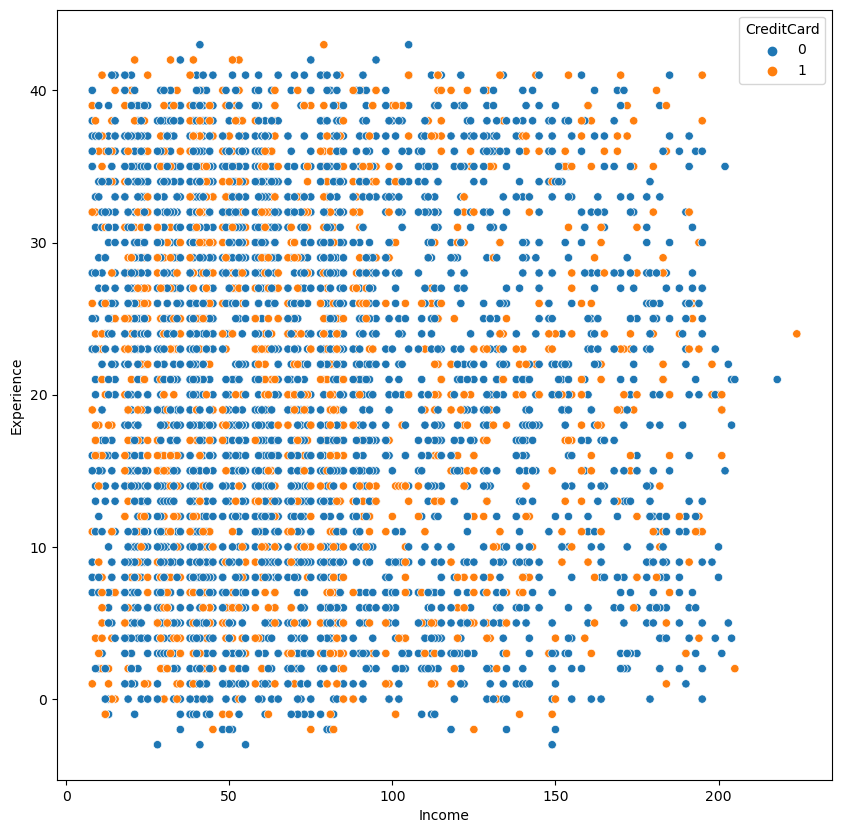

In [157]:
plt.figure(figsize=(10,10))
sns.scatterplot(data,x='Income',y='Experience',hue='CreditCard')

In [158]:
X=data.drop(['ID','ZIP Code','CreditCard'],axis=1)
y=data['CreditCard']

In [159]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [160]:
scaler=RobustScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [161]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=150)

In [162]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [163]:
y_pred=model.predict(X_test)

In [164]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       861
           1       0.25      0.52      0.33       139

    accuracy                           0.71      1000
   macro avg       0.58      0.63      0.58      1000
weighted avg       0.81      0.71      0.75      1000

